In [28]:
import pandas as pd
pd.options.display.max_columns=200
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.cluster import KMeans

In [29]:
#load data_1
data = pd.read_csv('data_1.csv')

In [30]:
data

,customer_unique_id,frequency,recency,amount_spent
0,0000366f3b9a7992bf8c76cfdf3221e2,1,612,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,609,18.90
2,0000f46a3911fa3c0805444483337064,1,186,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,1,402,25.99
4,0004aac84e0df4da2b147fca70cf8255,1,435,180.00
...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,2,276,1570.00
96092,fffea47cd6d3cc0a88bd621562a9d061,1,461,64.89
96093,ffff371b4d645b6ecea244b27531430a,1,155,89.90
96094,ffff5962728ec6157033ef9805bacc48,1,604,115.00


In [31]:
data.set_index('customer_unique_id', inplace=True)

In [32]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 5)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(data)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

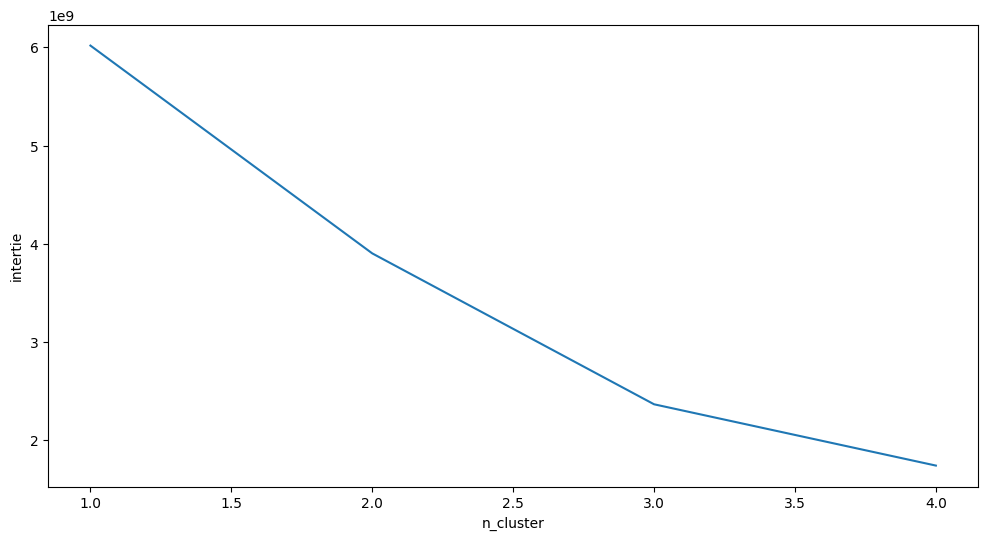

In [33]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertie")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [34]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [35]:
data_cluster = pd.DataFrame(data={'cluster': kmeans.labels_}, index=data.index)
data = data.merge(data_cluster, left_index=True, right_index=True)

In [36]:
data

,frequency,recency,amount_spent,cluster
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,612,129.90,0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,609,18.90,0
0000f46a3911fa3c0805444483337064,1,186,69.00,2
0000f6ccb0745a6a4b88665a16c9f078,1,402,25.99,2
0004aac84e0df4da2b147fca70cf8255,1,435,180.00,2
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,276,1570.00,1
fffea47cd6d3cc0a88bd621562a9d061,1,461,64.89,2
ffff371b4d645b6ecea244b27531430a,1,155,89.90,2


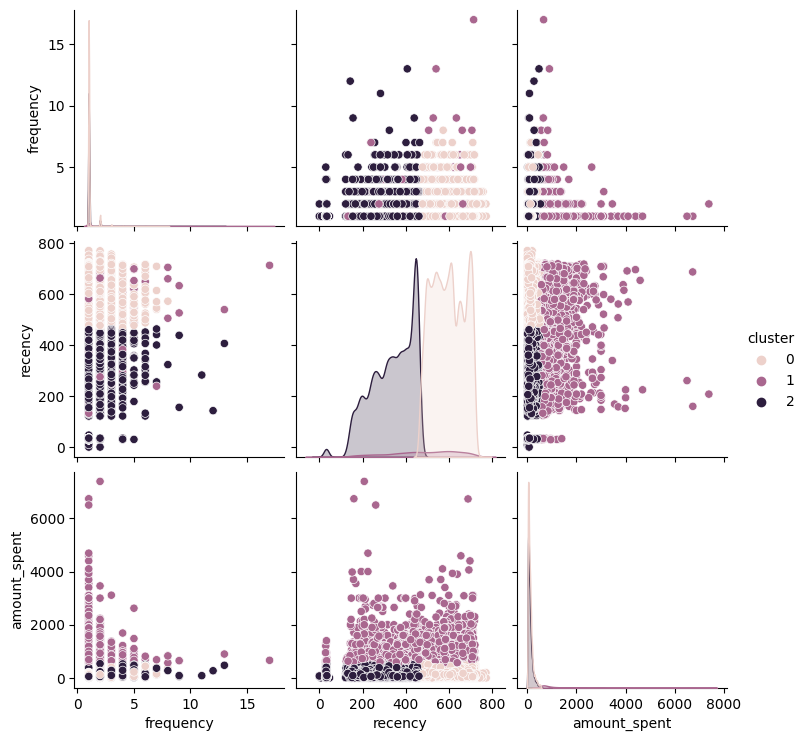

In [37]:
sns.pairplot(data, hue="cluster")

In [38]:
data.loc[data['amount_spent'] > 1000]

,frequency,recency,amount_spent,cluster
customer_unique_id,,,,
005226be8d5b972d0f72b4e8a79f322b,1,574,1561.00,1
00adeda9b742746c0c66e10d00ea1b74,2,428,2078.50,1
00c07da5ba0e07b4f248a3a373b07476,1,690,2258.00,1
011875f0176909c5cf0b14a9138bb691,1,194,3999.90,1
0129d48dce554d95f641d01eaa88904a,1,557,1390.00,1
...,...,...,...,...
ff0e4a6f3114ad1d211b885159bf1eb2,1,208,1654.44,1
ff4159b92c40ebe40454e3e6a7c35ed6,1,261,6499.00,1
ff6c9c45f6cee4ec0785650b18322d73,1,681,1499.00,1


In [39]:
data.sort_values(by='amount_spent', ascending=False)

,frequency,recency,amount_spent,cluster
customer_unique_id,,,,
da122df9eeddfedc1dc1f5349a1a690c,2,208,7388.0,1
dc4802a71eae9be1dd28f5d788ceb526,1,160,6735.0,1
459bef486812aa25204be022145caa62,1,688,6729.0,1
ff4159b92c40ebe40454e3e6a7c35ed6,1,261,6499.0,1
eebb5dda148d3893cdaf5b5ca3040ccb,1,225,4690.0,1
...,...,...,...,...
e9429d622d9e764ca60ba01bc252b0a8,1,389,0.0,2
79132474f452e159527245c7141ebabe,1,227,0.0,2
8886115442775dd8a20c2dcc921c7cc8,1,30,0.0,2


In [40]:
#log transformation
data['amount_spent'] = np.log(data['amount_spent'])

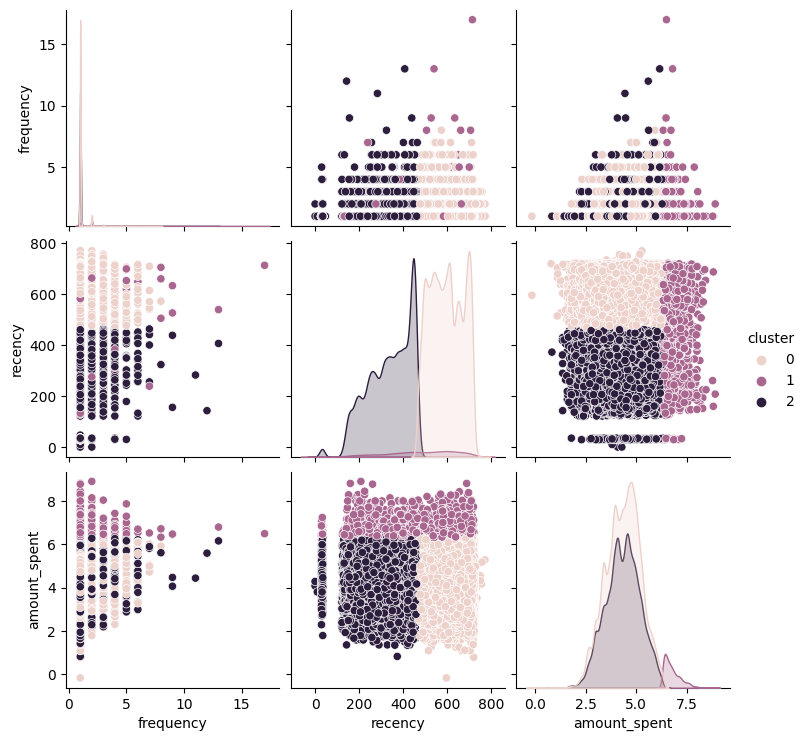

In [41]:
sns.pairplot(data, hue="cluster")

In [42]:
df = data.drop(data.loc[data['frequency']<2].index, axis=0)

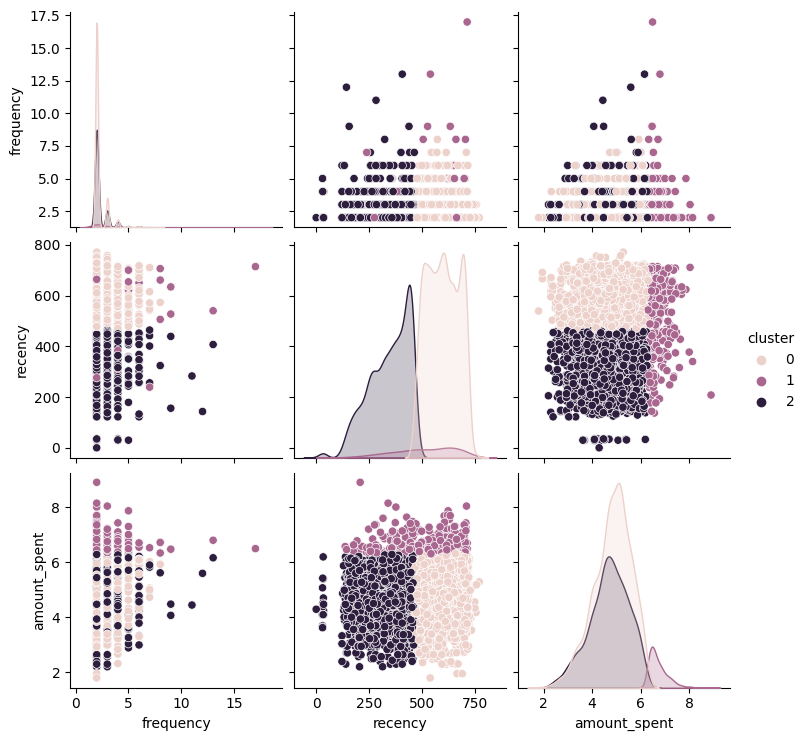

In [45]:
sns.pairplot(df, hue="cluster")

<AxesSubplot: xlabel='cluster', ylabel='recency'>

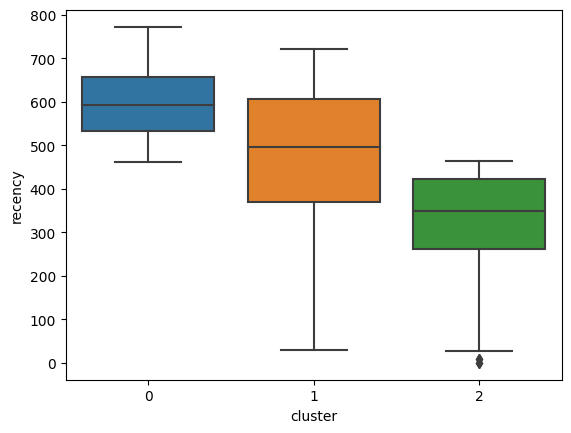

In [49]:
#boxplot
sns.boxplot(x='cluster', y='recency', data=data)